# Predicting Profits
### CourseraML: Homework #1

Coursera Course Link: https://www.coursera.org/learn/machine-learning/


##### Homework Description
In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. <br />
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.
You would like to use this data to help you select which city to expand to next.
The file **ex1data1.txt** contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.



### Importing Raw Data and Libraries

The data has already been cleaned so we don't need to change it at all. However, the columns are not labeled within the set. Please note that the first column is the **city population** and the second column is the **profit**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datafile = "./data/ex1data1.txt"

In [3]:
data = pd.read_csv(datafile, header = None) #read from dataset
X = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Linear Regression with One Variable

### 1. Plotting the Data

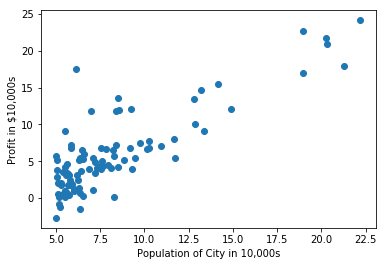

In [4]:
plt.scatter(X, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

### 2. Gradient Descent

Fitting the linear regression parameters θ to the dataset using gradient descent.

#### 2.1 Update Equations

The objective of linear regression is to minimize the cost function J(θ):
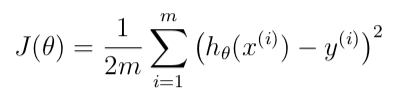


                                                                                                                       
where the hypothesis hθ(x) is given by the linear model:
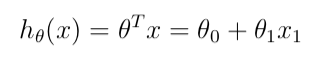

The parameters of the model are the θj values. These values are adjusted to minimize cost J(θ) through **gradient descent**.

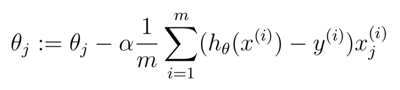

#### 2.2 Implementation

Here we add another dimension to our data to accommodate the θ0 intercept term, or our **bias**. <br />
We also initialize the initial parameters to 0 and the learning rate alpha to 0.01.

In [5]:
X = X[:,np.newaxis]
y = y[:,np.newaxis]
theta = np.zeros([2,1])
iterations = 1500
alpha = 0.01
ones = np.ones((m,1))
X = np.hstack((ones, X))

#### 2.3 Computing the cost J(θ)

Using computeCost() function to measure the difference between the predicted and actual values

In [6]:
def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)
J = computeCost(X, y, theta)
print(J)

32.072733877455676


#### 2.4 Gradient descent

Next, we optimize our parameters using the gradientDescent() function

In [7]:
def gradientDescent(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta
theta = gradientDescent(X, y, theta, alpha, iterations)
print('bias', theta[0])
print('first feature', theta[1])

bias [-3.63029144]
first feature [1.16636235]


After running the gradient descent function, we find that our hypothesis is roughly <br /> **h(θ) = 1.166 * X - 3.63**

When we call the cost function again, we see that the cost has been reduced from **32.07** to **4.48**

In [8]:
J = computeCost(X, y, theta)
print(J)

4.483388256587726


### 3. Visualizing the Model

Now that we have our predicted line of best fit, let's compare it to the original scatter plot.

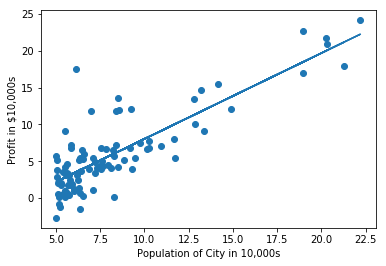

In [9]:
plt.scatter(X[:,1], y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], np.dot(X, theta))
plt.show()

Next, let's graph our cost function to gain some intuition of what gradient descent does. 
Here is a 3D view:

In [10]:
from mpl_toolkits.mplot3d import Axes3D
# Grid over which we will calculate J 
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i][j] = computeCost(X,y,t)

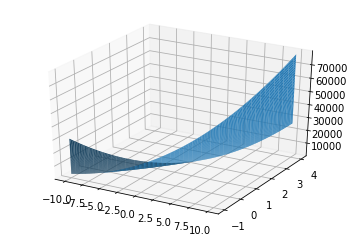

In [13]:
# Surface plot using J_Vals
fig = plt.figure()
ax = plt.subplot(111,projection='3d')
Axes3D.plot_surface(ax,theta0_vals,theta1_vals,J_vals)
plt.show()

It's a little hard to see the 

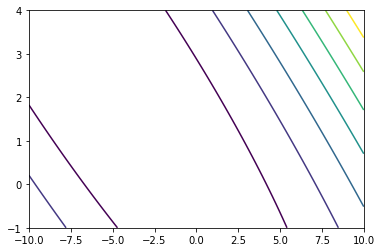

In [14]:
fig2 = plt.figure()
ax = plt.subplot(111)
plt.contour(theta0_vals,theta1_vals,J_vals) 

Notice how the coordinates of the center of our 
bias [-3.63029144]
first feature [1.16636235]

## Linear Regression with Multiple Variables

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. <br />
Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. The file **ex1data2.txt** contains a training set of housing prices in Portland, Oregon. The first column is the **size of the house** (in square feet), the second column is the **number of bedrooms**, and the third column is the **price of the house**.
The ex1 multi.m script has been set up to help you step through this exercise.

In [ ]:
datafile2 = "./data/ex1data2.txt"

### Importing Raw Data

In [ ]:
data = pd.read_csv(datafile2, sep = ',', header = None)
X = data.iloc[:,0:2] # read first two columns into X
y = data.iloc[:,2] # read the third column into y
m = len(y) # no. of training samples
data.head()

### 1. Feature Normalization

By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.
By implementing the standard deviation function, we can scale our features to be easily comparable.

In [ ]:
X = (X - np.mean(X))/np.std(X)

Next, we initialize the parameters and add the bias.

In [ ]:
ones = np.ones((m,1))
X = np.hstack((ones, X))
alpha = 0.01
num_iters = 400
theta = np.zeros((3,1))
y = y[:,np.newaxis]

### 2. Gradient Descent

Compute the cost using computeCostMulti()

In [ ]:
def computeCostMulti(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)
J = computeCostMulti(X, y, theta)
print(J)

Use gradient descent to find the optimal parameters:

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta
theta = gradientDescentMulti(X, y, theta, alpha, num_iters)
print(theta)

Here is our new cost value below:

In [ ]:
J = computeCostMulti(X, y, theta)
print(J)

### Visualizing the Model